# Lecture 17

Today:
1. Review of hypotesis test
2. Application: A/B Testing
    + Example
3. Causality

# 1. Review of hypotesis test

A possible rule for rejecting the null hypothesis:

- establish cutoff for p-value

- for example, a 5% cutoff: if the observed p-value is 5% or less, then reject the null hypothesis. Otherwise, do not reject it

# 2. A/B Testing: Comparing Two Samples

- compare values of sampled individuals in group a with values of sampled individuals in group b
- example: random sample of visiotrs to etsy. comparing A) click rate using design A vs B) click rate using design B

### Example: smoking behaviors of mothers and its influence on babies weights

- comparing A) birth weights of babies of mothers who smoked during pregnancy vs. B) birth weights of babies of mothers who didn't smoke. question: could the difference be due to chance alone?

HYPOTHESES
- Null: In the population, the distributions of the birth weights of babies in two groups are the same
- Alternate: babies of the mothers who smoked weighed less than the babies of the non-smokers
- To test this we have to compute a test statistic (one number) between group A and group B. the test statistic is group b - group a
    - the statistic for the null hypothesis would be 0

SIMULATION
- If the null is true, all rearrangements of the birth weights among the two groups are equally likely.
- Plan:
    - shuffle birth weights
    - assign some to "group a" and the rest to "group b," maintaining sample sizes
    - find the difference b/t the averages of two shuffled groups
    -repeat

In [1]:
library('dplyr')
library('ggplot2')


Attaching package: ‘dplyr’



The following objects are masked from ‘package:stats’:

    filter, lag



The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
babyweight <- read.csv("babyweight.csv")

In [12]:
dim(babyweight)

32 
 4

In [3]:
head(babyweight)

X Wgt Gest Smoke 
 
 1 2940 38 yes 
 2 3130 38 no 
 3 2420 36 yes 
 4 2450 34 no 
 5 2760 39 yes 
 6 2440 35 yes

In [9]:
smokers <- filter( babyweight, Smoke == "yes")
head(smoker)
ave_weight_smokers <- mean(smokers$Wgt)
ave_weight_smokers

X Wgt Gest Smoke 
 
 1 2940 38 yes 
 3 2420 36 yes 
 5 2760 39 yes 
 6 2440 35 yes 
 8 3301 42 yes 
 11 2715 36 yes

2973.625

In [8]:
nonsmokers <- filter( babyweight, Smoke == "no")
ave_weight_nonsmokers <- mean(nonsmokers$Wgt)
ave_weight_nonsmokers

3066.125

In [10]:
babyweight_grouped <- group_by( babyweight, Smoke )
babyweight_summary <- summarize(babyweight_grouped, AveWeight = mean(Wgt))
babyweight_summary

Smoke AveWeight 
 
 no 3066.125 
 yes 2973.625

In [11]:
# observed statistic

observed_diff <- ave_weight_nonsmokers - ave_weight_smokers
observed_diff

92.5

In [16]:
# Selecting elements from a list

shuffled_babies <- sample( babyweight$Wgt, 32, replace = FALSE )
shuffled_babies
shuffled_babies[c(1, 3)] #selecting first and third baby
shuffled_babies[1:16] #first sixteen numbers in the list; telling R what index to select
shuffled_babies[17:32] #last sixteen numbers in the list

2420 
 3523 
 3459 
 2440 
 2520 
 3200 
 2957 
 3346 
 2928 
 2450 
 2920 
 3446 
 2619 
 3244 
 3226 
 3095 
 2760 
 3175 
 3322 
 2729 
 3500 
 2740 
 2715 
 3530 
 2841 
 3130 
 3410 
 3130 
 2580 
 2940 
 3301 
 3040

2420 
 3459

2420 
 3523 
 3459 
 2440 
 2520 
 3200 
 2957 
 3346 
 2928 
 2450 
 2920 
 3446 
 2619 
 3244 
 3226 
 3095

2760 
 3175 
 3322 
 2729 
 3500 
 2740 
 2715 
 3530 
 2841 
 3130 
 3410 
 3130 
 2580 
 2940 
 3301 
 3040

In [19]:
# simulate

num_simulations <- 1000

# set up data frame with 1000 rows, each row being an observation. one column would be the test statistic. test statistic = mean weight of group b - mean weight of group a. two other columns would be average weight group A and average weight of group B.
simulated_data <- data.frame(ave_weight_A = double(num_simulations), 
                             ave_weight_B = double(num_simulations),
                             statistic = double(num_simulations) )


count <- 1
while( count <= num_simulations ) {

    shuffled_babies <- sample( babyweight$Wgt, 32, replace = FALSE )
    group_A <- shuffled_babies[1:16]
    group_B <- shuffled_babies[17:32]
    
    #find mean of weight in each group, place in correct data frame, and then find the difference
    simulated_data$ave_weight_A[count] <- mean(group_A)
    simulated_data$ave_weight_B[count] <- mean(group_B)
    simulated_data$statistic[count] <- simulated_data$ave_weight_B[count] - simulated_data$ave_weight_A[count]


    count <- count + 1
}

In [20]:
head(simulated_data)

ave_weight_A ave_weight_B statistic 
 
 3034.688 3005.062 -29.625 
 2990.938 3048.812 57.875 
 2994.250 3045.500 51.250 
 3011.438 3028.312 16.875 
 3077.438 2962.312 -115.125 
 3019.250 3020.500 1.250

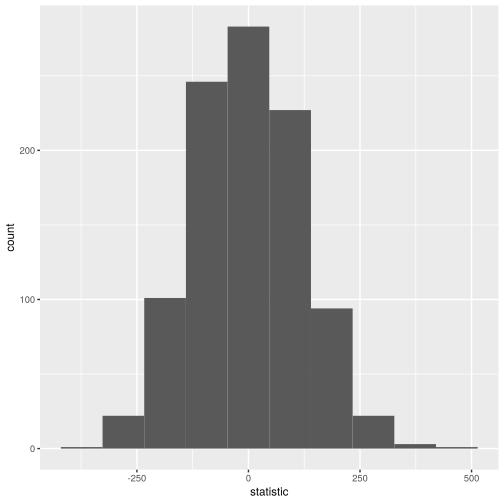

In [21]:
ggplot(simulated_data, aes( x = statistic)) + geom_histogram( bins = 10 )

In [23]:
# find percentile of observed stat:
sum( simulated_data$statistic <= observed_diff ) / 1000

# area to the left is 76.6th percentile

0.766

In [25]:
# p-value
1-sum(simulated_data$statistic <= observed_diff) / 1000

# area to the right is 23.4th percentile

0.234